In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [3]:
x, y = make_blobs(n_samples=9, n_features=2, centers=3, cluster_std=[0.75,0.5, 1], random_state=42)

In [4]:
def plot_blobs(x, y, ax, cmap='viridis'):
    labels = np.unique(y)
    cmap_ = plt.get_cmap(cmap, lut=len(labels))
    for label in labels:
        sub_idx = np.argwhere(y == label).ravel()
        sub_x = x[sub_idx]
        sub_y = y[sub_idx]
        ax.scatter(sub_x[:,0], sub_x[:,1], color=cmap_(label), label=label)

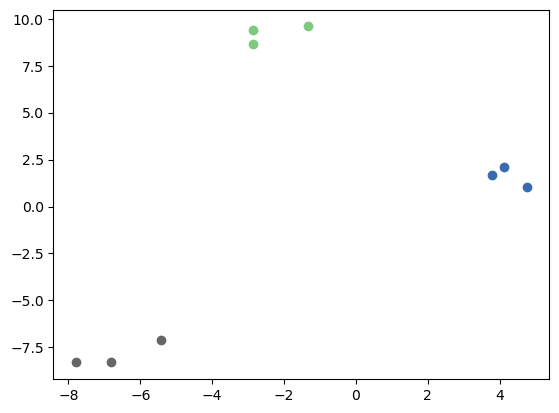

In [5]:
plot_blobs(x,y, ax=plt.gca(), cmap='Accent')

In [6]:
from sklearn.cluster import KMeans

In [7]:
model = KMeans(n_clusters=3, n_init=10)
model.fit(x)
pred = model.predict(x)

In [8]:
model.cluster_centers_

array([[-2.34761744,  9.22535238],
       [-6.67124289, -7.90105232],
       [ 4.22391439,  1.61294961]])

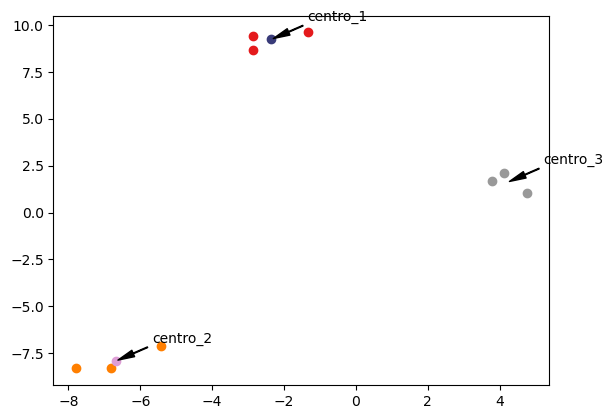

In [9]:
fig, ax = plt.subplots()
plot_blobs(x, pred, ax=ax, cmap='Set1')
plot_blobs(model.cluster_centers_, np.array([0,1]), ax=ax, cmap='tab20b')
for center, text in zip(model.cluster_centers_, ['centro_1', 'centro_2', 'centro_3']):
    ax.annotate(text=text, xy=center, xytext=center + 1,
    arrowprops=dict(facecolor='black', shrink=0.05, width=0.5, headwidth=5))
plt.show()

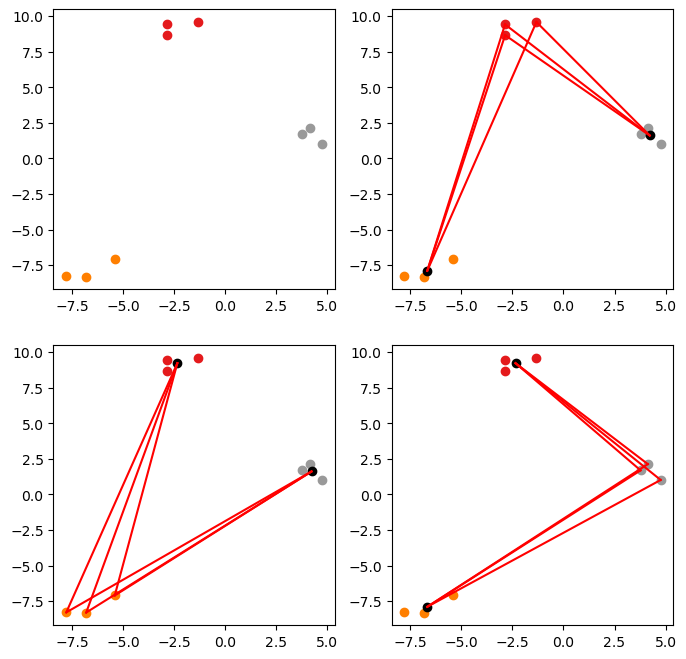

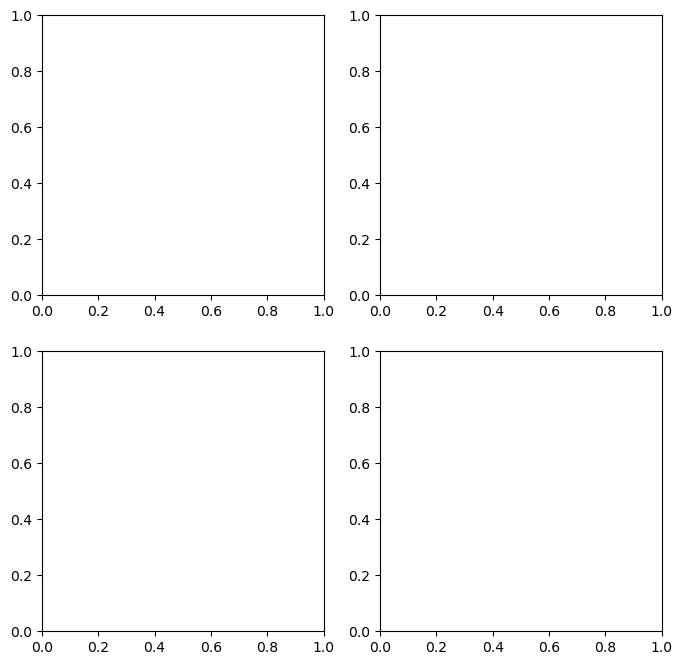

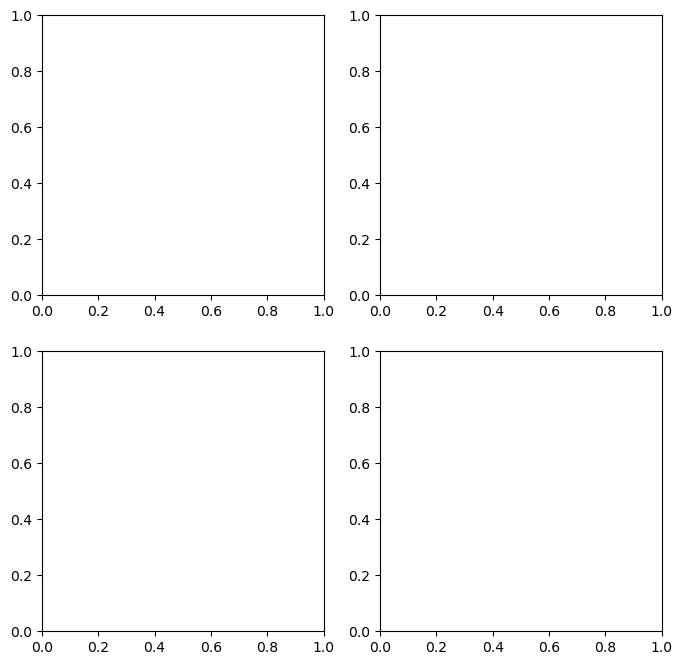

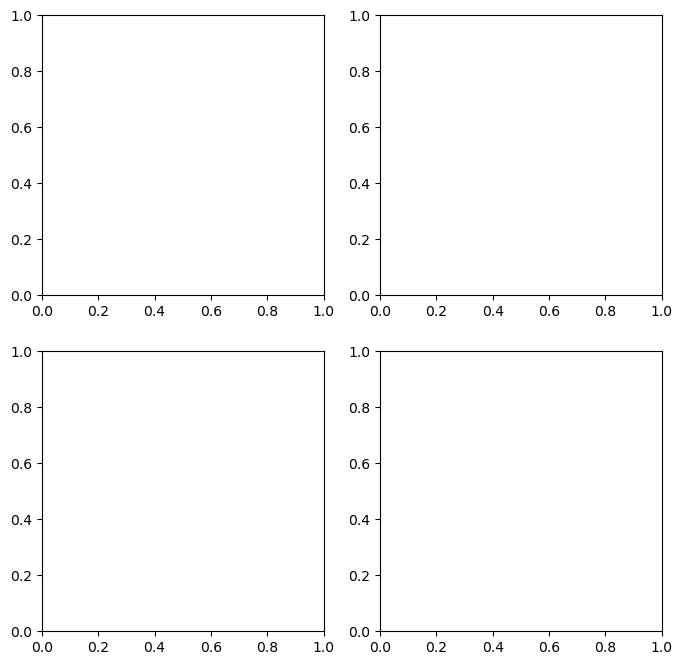

In [10]:
fig, axes = plt.subplots(2,2, figsize=(8,8))
plot_blobs(x, pred, ax=axes.ravel()[0], cmap='Set1')
# plot_blobs(model.cluster_centers_, np.array([0,1]), ax=axes.ravel()[0], cmap='tab20b')

for label, ax in zip(np.unique(pred), axes.ravel()[1:]):
    fig, axes = plt.subplots(2,2, figsize=(8,8))
    plot_blobs(x, pred, ax=ax, cmap='Set1')
    # plot_blobs(model.cluster_centers_, np.array([0,1]), ax=ax, cmap='viridis')
    sub_idx = np.argwhere(pred == label).ravel()
    neg_idx = np.argwhere(np.unique(pred) != label).ravel()
    sub_array = x[sub_idx]
    sub_centers = model.cluster_centers_[neg_idx]
    for center in sub_centers:
        ax.scatter(*center, color='black')
        diff = sub_array ** 2 - center **2
        for point in sub_array:
            ax.plot(*np.array([point, center]).T, color='red')
plt.show()

In [11]:
sub_array ** 2 - sub_centers[0] **2

array([[ 17.15448003, -84.07379424],
       [ 11.57421102, -80.56897683],
       [  8.75759361, -82.24417488]])